In [1]:
import numpy as np
import cv2
from PIL import Image  
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
img_path = "Banana.jpg"
img = cv2.imread(img_path)
img=cv2.resize(img,(300,300))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("img",gray)
cv2.waitKey(0)

-1

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9),0) 
img2 = gray-blurred
cv2.imshow("img2",img2)
cv2.waitKey(0)

-1

In [4]:
blurred = cv2.GaussianBlur(img2 , (5, 5),20)
(_, thresh) = cv2.threshold(blurred, 40, 255, cv2.THRESH_BINARY)
cv2.imshow("img3",thresh)
cv2.waitKey(0)

-1

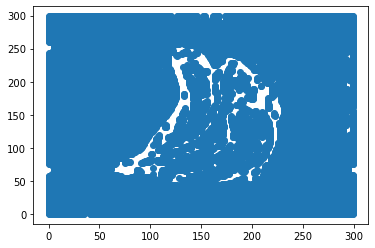

In [5]:
size_x = thresh.shape[0]
size_y = thresh.shape[1]
picture_data = np.array(thresh)
Pic_Data = []

for i in range(size_x):
    for j in range(size_y):
        if picture_data[i][j] == 0:
            Pic_Data.append([i,j])
            #plt.plot(i,j,'o')
X=np.array(Pic_Data)
size=len(X)
y_pred = DBSCAN(eps = 50, min_samples = 10).fit_predict(X)
#plt.plot(X[0:size,1],X[0:size,0],'o')
Pic_Data_1 = []
for k in range(len(X)):
    if(y_pred[k]==0):
        Pic_Data_1.append(Pic_Data[k])
        
X=np.array(Pic_Data_1)
plt.plot(X[:, 0], X[:, 1],'o')
plt.show()

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2.imshow("img5",closed)
cv2.waitKey(0)

-1

In [7]:
closed = cv2.erode(closed, None, iterations=16)
closed = cv2.dilate(closed, None, iterations=16)

In [8]:
def findcnts_and_box_point(closed):
    
    cnts,_ = cv2.findContours(closed.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    
    return box


In [9]:
def drawcnts_and_cut(original_img, box):
    draw_img = cv2.drawContours(original_img.copy(), [box], -1, (0, 0, 255), 3)
    
    Xs = [i[0] for i in box]
    Ys = [i[1] for i in box]
    x1 = min(Xs)
    x2 = max(Xs)
    y1 = min(Ys)
    y2 = max(Ys)
    hight = y2 - y1
    width = x2 - x1
    crop_img = original_img[y1:y1+hight, x1:x1+width]
    
    return draw_img, crop_img


In [10]:
def image_morphology(thresh):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    closed = cv2.erode(closed, None, iterations=4)
    closed = cv2.dilate(closed, None, iterations=4)
    
    return closed


In [11]:
def Thresh_and_blur(gradient):
    
    blurred = cv2.GaussianBlur(gradient, (5, 5),20)
    (_, thresh) = cv2.threshold(blurred, 40, 255, cv2.THRESH_BINARY)
    
    return thresh

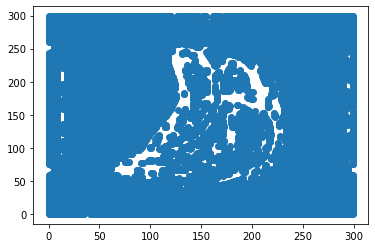

In [12]:
original_img = cv2.imread('Banana.jpg')
original_img = cv2.resize(img,(300,300))
gray=cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5),20) 
img2 = gray-blurred

blurred = cv2.GaussianBlur(img2, (5, 5),20)
(_, thresh) = cv2.threshold(blurred, 40, 255, cv2.THRESH_BINARY)


size_x = thresh.shape[0]
size_y = thresh.shape[1]
picture_data = np.array(thresh)
Pic_Data = []


for i in range(size_x):
    for j in range(size_y):
        if picture_data[i][j] == 0:
            Pic_Data.append([i,j])
            #plt.plot(i,j,'o')
X=np.array(Pic_Data)
size=len(X)
y_pred = DBSCAN(eps = 40, min_samples = 10).fit_predict(X)
#plt.plot(X[0:size,1],X[0:size,0],'o')
Pic_Data_1 = []
for k in range(len(X)):
    if(y_pred[k]==0):
        Pic_Data_1.append(Pic_Data[k])
        
X=np.array(Pic_Data_1)
plt.plot(X[:, 0], X[:, 1],'o')
plt.show()

Test_Pic = [[255 for i in range(size_y)] for j in range(size_x)]
Test_Pic = np.array(Test_Pic)
#X=np.array(Pic_Data_1,dtype=np.uint8)

for X_Index in X:
    Test_Pic[X_Index[0]][X_Index[1]]=0


thresh=np.array(Test_Pic,dtype=np.uint8)

gray = thresh
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0) 
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1) 
gradient = cv2.subtract(gradX, gradY) 

thresh = gradient
thresh = Thresh_and_blur(gradient)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
closed = cv2.erode(closed, None, iterations=16)
closed = cv2.dilate(closed, None, iterations=16)


closed = np.array(closed,np.uint8)
box = findcnts_and_box_point(closed)
draw_img, crop_img = drawcnts_and_cut(original_img,box)




In [14]:
cv2.imshow('original_img', original_img)
cv2.waitKey(0)
#cv2.imshow('blurred', blurred)
#cv2.imshow('gradX', gradX)
#cv2.imshow('gradY', gradY)
#cv2.imshow('final', gradient)
#cv2.imshow('thresh', thresh)
#cv2.imshow('closed', closed)
cv2.imshow('draw_img', draw_img)
cv2.waitKey(0)
cv2.imshow('crop_img', crop_img)
cv2.waitKey(0)


-1

In [15]:
help(cv2.findContours) 

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @p